 **Family Wize Error Rate - Type I error analysis from the top 98 american ETF´s. Is this pairs trading worth it?**

# 1) Storytelling

The Family Wize Error Rate is a multiple hipothesys test where it´s Type I probability Error (false positive) increases as long as hipothesys and multicomparations are made.

But... What if we could explore mean to reversion bias in a pairs trading strategy from 98 american ETF´s?

First, we test the null hipothesys that our 98 mean returns doesn´t revert to the mean. So, we apply the T test and reduce the scope to 12.


It´s time to make some multicomparison corrections with Benferroni and Holm tests.
You´ll see that both of them rejected the null hipothesis and consequently accepted H1 (there´s a signicative relevance between multiple means.. we should make more tests) in funds BIL, JPST, SGOV e SHV.

But look: this 4 funds take 74 to 77 positions in a mean return ascendent order. We considered slow and not significant.

Alternatively, we decided to test the significantive performance difference between the biggest (TQQQ) and the smallest (TLT) means in our 98 scope. Again, it showed a 0.174 p-value. There´s no significance.

At last, we applied the pairs Tukey HSD test between the 3 biggest mean retuns (TQQQ, XLE, SMH) and the smallest ones (TLT, IEF, GOVT).

All paired adjusted pvalues indicated to accept the null hyphotesis, bringing more evidence that it´s not viable to make a profit mean reversion trading strategy on the 98 biggest market value funds.





 # 2) Libs

In [11]:
# Import libs

import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import \
    (ttest_1samp,
     ttest_rel,
     ttest_ind,
     t as t_dbn)
from statsmodels.stats.multicomp import \
     pairwise_tukeyhsd
from statsmodels.stats.multitest import \
     multipletests as mult_test

# 3) Web scrapping and Cleaning Data

In [12]:
# Top market value 98 american ETF

# Fonte: https://etfdb.com/compare/market-cap/

# Order alfabeticaly and visualize at list type
# tickers.sort()
# print(tickers, end='')

tickers = ['ACWI', 'AGG', 'BIL', 'BIV', 'BND', 'BNDX', 'BSV', 'COWZ', 'CSHX', 'DGRO', 'DIA', 'DVY', 'EFA', 'EFV', 'GLD', 'GOVT',
           'IAU', 'IEF', 'IEFA', 'IEMG', 'IGSB', 'IJH', 'IJR', 'ITOT', 'IUSB', 'IUSG', 'IUSV', 'IVE', 'IVV', 'IVW', 'IWB', 'IWD',
           'IWF', 'IWM', 'IWR', 'IXUS', 'IYW', 'JEPI', 'JPST', 'LQD', 'MBB', 'MDY', 'MGK', 'MUB', 'QQQ', 'QQQM', 'QUAL', 'RSP',
           'SCHB', 'SCHD', 'SCHF', 'SCHG', 'SDY', 'SGOV', 'SHV', 'SHY', 'SMH', 'SPDW', 'SPLG', 'SPY', 'SPYG', 'SPYV', 'TLT',
           'TQQQ', 'USHY', 'USMV', 'VB', 'VBR', 'VCIT', 'VCSH', 'VEA', 'VEU', 'VGIT', 'VGK', 'VGSH', 'VGT', 'VIG', 'VNQ', 'VO',
           'VONG', 'VOO', 'VT', 'VTEB', 'VTI', 'VTV', 'VUG', 'VV', 'VWO', 'VXF', 'VXUS', 'VYM', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK',
           'XLV', 'XLY']
len(tickers)

98

In [13]:
# Download price

cotacao = yf.download(tickers, start='2021-01-01', actions=True)['Adj Close']
cotacao.head()

[*********************100%***********************]  98 of 98 completed


Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,...,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,84.756996,106.498062,82.721535,82.669304,79.365227,52.343590,76.613174,31.156059,46.690121,40.493141,...,155.058044,54.149891,80.654083,64.224007,32.745716,27.158768,81.555214,123.971817,106.592918,154.748520
2021-01-05 00:00:00+00:00,85.630699,106.389824,82.712486,82.553528,79.230049,52.289955,76.576172,31.549850,47.045109,40.713062,...,157.342133,54.937279,81.341057,64.455856,34.212200,27.280180,82.357468,124.776314,107.366753,155.903625
2021-01-06 00:00:00+00:00,86.109825,105.866524,82.721535,82.188423,78.878609,52.218441,76.502258,32.562443,48.367455,41.464470,...,160.734802,55.232540,83.384201,64.146729,35.255989,28.484953,84.320602,122.624504,108.838966,157.495575
2021-01-07 00:00:00+00:00,87.011688,105.758240,82.721535,82.081558,78.716400,52.227386,76.493019,32.834339,48.189957,41.776024,...,164.089172,55.465172,83.874886,64.996841,35.773571,28.895884,84.783058,125.929741,110.254539,160.533875
2021-01-08 00:00:00+00:00,87.782036,105.631920,82.712486,81.912361,78.644287,52.191647,76.456070,32.768711,48.811188,41.821835,...,164.347214,56.172016,83.892738,65.199738,35.730431,28.877205,84.575424,126.743950,110.783035,163.843933


In [14]:
# Price data

cotacao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 955 entries, 2021-01-04 00:00:00+00:00 to 2024-10-18 00:00:00+00:00
Data columns (total 98 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACWI    955 non-null    float64
 1   AGG     955 non-null    float64
 2   BIL     955 non-null    float64
 3   BIV     955 non-null    float64
 4   BND     955 non-null    float64
 5   BNDX    955 non-null    float64
 6   BSV     955 non-null    float64
 7   COWZ    955 non-null    float64
 8   CSHX    955 non-null    float64
 9   DGRO    955 non-null    float64
 10  DIA     955 non-null    float64
 11  DVY     955 non-null    float64
 12  EFA     955 non-null    float64
 13  EFV     955 non-null    float64
 14  GLD     955 non-null    float64
 15  GOVT    955 non-null    float64
 16  IAU     955 non-null    float64
 17  IEF     955 non-null    float64
 18  IEFA    955 non-null    float64
 19  IEMG    955 non-null    float64
 20  IGSB    955 non-null    flo

In [15]:
# Price desctiptive statistics

cotacao.describe()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,...,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,...,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,94.987546,97.342145,85.053189,75.056234,72.413653,48.298886,74.368992,46.264577,52.533394,49.855783,...,157.108677,55.215497,102.773455,68.560965,70.689757,35.388474,101.855184,160.543604,129.243566,166.589789
std,9.822366,5.355777,2.883671,4.258020,4.000320,2.380507,2.005119,5.730416,8.797925,4.714146,...,18.181192,4.561346,9.676131,11.672660,17.388074,4.010227,12.730673,31.121262,10.712830,17.835084
min,74.802727,87.353287,82.613083,67.069740,64.993652,43.890255,70.154816,31.156059,38.026875,40.419838,...,122.453362,42.739674,80.654083,44.505028,32.745716,27.037355,80.007347,114.629639,104.563934,124.379402
25%,88.176968,93.323582,82.679077,71.826111,69.410973,46.085709,72.620090,42.433886,44.587387,47.073681,...,140.208427,52.292776,96.554337,58.180880,51.594189,32.448336,95.035969,134.670464,123.547634,152.422676
50%,93.999710,95.399780,83.461716,73.531410,70.995819,48.116493,74.713120,45.728283,50.142406,48.884819,...,159.742828,55.805176,101.242432,69.141281,76.645515,34.600674,98.267082,151.164459,128.057739,168.683517
75%,99.798016,103.391243,87.246193,79.640999,76.900169,50.952570,76.237595,49.395063,62.910358,51.295427,...,173.513504,58.869316,105.301964,78.505581,84.269348,37.532791,106.850121,176.860580,133.185593,178.089005
max,120.779999,106.498062,91.669998,82.669304,79.365227,52.343590,78.646492,58.799999,67.235100,63.889999,...,192.517242,65.370003,131.470001,91.230003,96.501701,47.619999,139.270004,237.253830,156.655716,206.163605


In [16]:
# Checking NaN values

cotacao.isnull().sum().sum()

0

# 4) Input: ETF´s daily returns

In [17]:
# Function to calculate the ETF´s daily returns

def ret(cotacao):
  retorn = cotacao.pct_change()
  return retorn

retorno = cotacao.apply(ret, axis=0)
retorno = retorno.fillna(0)
retorno.head()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,...,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05 00:00:00+00:00,0.010308,-0.001016,-0.000109,-0.001400,-0.001703,-0.001025,-0.000483,0.012639,0.007603,0.005431,...,0.014731,0.014541,0.008518,0.003610,0.044784,0.004470,0.009837,0.006489,0.007260,0.007464
2021-01-06 00:00:00+00:00,0.005595,-0.004919,0.000109,-0.004423,-0.004436,-0.001368,-0.000965,0.032095,0.028108,0.018456,...,0.021562,0.005375,0.025118,-0.004796,0.030509,0.044163,0.023837,-0.017245,0.013712,0.010211
2021-01-07 00:00:00+00:00,0.010473,-0.001023,0.000000,-0.001300,-0.002056,0.000171,-0.000121,0.008350,-0.003670,0.007514,...,0.020869,0.004212,0.005885,0.013253,0.014681,0.014426,0.005484,0.026954,0.013006,0.019291
2021-01-08 00:00:00+00:00,0.008853,-0.001194,-0.000109,-0.002061,-0.000916,-0.000684,-0.000483,-0.001999,0.012891,0.001097,...,0.001573,0.012744,0.000213,0.003122,-0.001206,-0.000646,-0.002449,0.006466,0.004793,0.020619


In [18]:
# Return desctiptive statistics

retorno.describe()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,...,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,...,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.000419,-0.000063,0.000108,-0.000066,-0.000068,-0.000038,0.000021,0.000731,0.000257,0.000516,...,0.000301,0.000222,0.000549,0.000462,0.001215,0.000658,0.000616,0.000767,0.000417,0.000379
std,0.009946,0.004061,0.000174,0.004295,0.004017,0.003266,0.001805,0.011465,0.011692,0.008751,...,0.014180,0.009911,0.008725,0.013716,0.017401,0.011842,0.010578,0.015211,0.008670,0.015019
min,-0.039522,-0.016394,-0.000274,-0.016734,-0.016153,-0.014637,-0.007061,-0.051706,-0.083333,-0.037451,...,-0.054036,-0.033648,-0.034467,-0.066903,-0.082730,-0.040618,-0.037659,-0.053085,-0.036474,-0.065384
25%,-0.005082,-0.002485,0.000000,-0.002706,-0.002554,-0.002104,-0.000923,-0.005971,0.000000,-0.004016,...,-0.008358,-0.005699,-0.004486,-0.006875,-0.009141,-0.006144,-0.005619,-0.008314,-0.004428,-0.007852
50%,0.000545,-0.000089,0.000109,0.000000,-0.000071,-0.000173,0.000000,0.001039,0.000000,0.000756,...,0.000524,0.000509,0.000912,0.000713,0.001691,0.000862,0.001084,0.000974,0.000600,0.001195
75%,0.006285,0.002350,0.000218,0.002426,0.002347,0.001841,0.000852,0.007621,0.000000,0.005506,...,0.009672,0.006176,0.005730,0.008318,0.011112,0.007654,0.007085,0.010043,0.005694,0.009262
max,0.053608,0.021470,0.000765,0.021883,0.020703,0.013344,0.008322,0.039853,0.135818,0.044733,...,0.068877,0.049231,0.034995,0.065674,0.056512,0.050487,0.041954,0.082176,0.030615,0.073084


# 5) Test T - null hyphotesis test for independent variables

In [19]:
#  Test T for independent samples

# The null hyphotesis H0 from our test T indicates the no significative difference between mean individual return and
# the mean returns from all the sample.

# The probability value results > 0.05 indicate the fail to reject (i.o, clue to accepct) the null hipothesys.
# Alternatively, when it´s value is < 0.05 we say there´s a fail to accept (i.o, clue to reject) the null hipothesys and
# accepct the alternative hipo H1 (there´s a difference...)

# Calculate the multivariate T Test
retorno_diario_ttest = np.zeros(len(retorno.columns))                     # Creating a multi zero arrays that will be filled with the pvalues from our mult T Test
retorno_diario_ttest
for i in range(len(retorno.columns)):                                     # Ranging fom the returns, appliying the T Test and printing all
  retorno_diario_ttest[i] = ttest_1samp(retorno.iloc[:,i], 0).pvalue

retorno_diario_ttest

array([1.93028196e-01, 6.33222770e-01, 2.42490476e-69, 6.36457222e-01,
       6.03672129e-01, 7.21958499e-01, 7.19901753e-01, 4.90862632e-02,
       4.96337787e-01, 6.88050694e-02, 9.12695192e-02, 7.17986085e-02,
       3.94435035e-01, 2.16246216e-01, 1.93122469e-01, 4.71498533e-01,
       1.87350048e-01, 4.22568075e-01, 4.21450676e-01, 8.46638767e-01,
       4.34949114e-01, 2.19938682e-01, 3.38210713e-01, 1.20485631e-01,
       6.86205738e-01, 1.75317194e-01, 4.21792116e-02, 4.07293637e-02,
       7.88518662e-02, 1.75654139e-01, 1.05398683e-01, 9.88158492e-02,
       1.55212714e-01, 5.01046460e-01, 2.56976309e-01, 5.03982626e-01,
       1.30549073e-01, 3.84520860e-02, 5.26845116e-23, 6.92394889e-01,
       7.09469255e-01, 2.31624903e-01, 1.68037469e-01, 9.04013074e-01,
       1.81326487e-01, 1.77698276e-01, 9.29677695e-02, 1.28744444e-01,
       8.00991634e-02, 3.85091318e-02, 3.23717381e-01, 1.28796298e-01,
       1.09339167e-01, 2.25829983e-88, 2.03106305e-53, 4.53086806e-01,
      

In [36]:
# Create a Df that contains only the < 0.05 results (reject H0)

# This funds represents the acceptance of the alternative hipo H1

# After that, we have to check for some multi hypothesis corrections like Benferroni and Holm.
# They try to correct the likelihood from Error Type 1 (False positives) in multicomparisons


retorno_diario_ttest_correct = pd.DataFrame(retorno_diario_ttest, index=retorno.columns, columns=['p-value'])
retorno_diario_ttest_correct = retorno_diario_ttest_correct.loc[retorno_diario_ttest_correct['p-value'] < 0.05]
print('Dos', len(tickers), 'fundos,', len(retorno_diario_ttest_correct), 'apresentaram pvalor < 0.05 e portanto, o erro de probabilidade Tipo I precisa ser aplicado aos dados')
print(len(retorno_diario_ttest_correct))
retorno_diario_ttest_correct

Dos 98 fundos, 12 apresentaram pvalor < 0.05 e portanto, o erro de probabilidade Tipo I precisa ser aplicado aos dados
12


,p-value
Ticker,
BIL,2.424905e-69
COWZ,4.908626e-02
IUSV,4.217921e-02
IVE,4.072936e-02
JEPI,3.845209e-02
JPST,5.268451e-23
SCHD,3.850913e-02
SGOV,2.258300e-88
SHV,2.031063e-53


In [21]:
# Check df values in a print comand

for i in retorno_diario_ttest:
  #print(i < 0.05)
  if i < 0.05:
         print(i)

2.424904764240967e-69
0.04908626321757801
0.042179211613155194
0.04072936366980504
0.03845208597978198
5.268451163206647e-23
0.038509131804732276
2.2582998349769406e-88
2.031063046192743e-53
0.0386006617467521
0.04367806199164689
0.031238872195810376


# 6) Hipothesys correction Methods

## 6.1) Benferroni Test

In [22]:
# Apply Benferroni Test

# The first variable 'reject_bonf' gives us a boolean result of the correction from the false positive multicomparisons
      # If TRUE,  confirms the rejection to H0 between the specific fund and all the sample;
      # If FALSE, corrects the rejection of the serie and accept H0 between specific fund and all the sample;

reject_bonf, bonferroni = mult_test(retorno_diario_ttest, method = "bonferroni")[:2]
reject_bonf

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [23]:
# 2 ways to find the second variable (float results)

# The second variable 'bonferroni' gives us the floating values that corresponds to the boolean results (the p values).

# If you compare 'benferroni' and 'retorno_diario_ttest_bonferroni'  you´ll see the same result.
# Try (bonferroni == retorno_diario_ttest_bonferroni). Boolean result will the all TRUE

retorno_diario_ttest_bonferroni = np.minimum(retorno_diario_ttest * len(retorno.columns),1 )
retorno_diario_ttest_bonferroni

array([1.00000000e+00, 1.00000000e+00, 2.37640667e-67, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 5.16308214e-21, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.21313384e-86, 1.99044179e-51, 1.00000000e+00,
      

In [38]:
# Create a Df Benferroni that contains only the < 0.05 results (reject H0)

# Look: Benferroni corrected 8 funds from our 12 H0 T test results. So for 4 of them, it´s indicated to reject null hipo
# and say: There´s a difference between means...

retorno_diario_ttest_correct_benf = pd.DataFrame(retorno_diario_ttest_bonferroni, index=retorno.columns, columns=['p-value'])
retorno_diario_ttest_correct_benf = retorno_diario_ttest_correct_benf.loc[retorno_diario_ttest_correct_benf['p-value'] < 0.05]
print(len(retorno_diario_ttest_correct_benf))
retorno_diario_ttest_correct_benf

4


,p-value
Ticker,
BIL,2.376407e-67
JPST,5.163082e-21
SGOV,2.213134e-86
SHV,1.990442e-51


## 6.2) Holm Test

In [25]:
# Apply Holm Test

reject_holm, holm = mult_test(retorno_diario_ttest, method = "holm", alpha=0.05)[:2]
reject_holm

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [26]:
# Create a Df Holm that contains only the < 0.05 results (reject H0)

# Same as Benferroni results

retorno_diario_ttest_correct_holm = pd.DataFrame(holm, index=retorno.columns, columns=['p-value'])
retorno_diario_ttest_correct_holm = retorno_diario_ttest_correct_holm.loc[retorno_diario_ttest_correct_holm['p-value'] < 0.05]
print(len(retorno_diario_ttest_correct_holm))
retorno_diario_ttest_correct_holm

4


,p-value
Ticker,
BIL,2.352158e-67
JPST,5.005029e-21
SGOV,2.213134e-86
SHV,1.949821e-51


In [27]:
# Concatenate Bonferroni e Holm results

pd.concat([retorno_diario_ttest_correct_benf, retorno_diario_ttest_correct_holm], axis=1)


,p-value,p-value
Ticker,,
BIL,2.376407e-67,2.352158e-67
JPST,5.163082e-21,5.005029e-21
SGOV,2.213134e-86,2.213134e-86
SHV,1.990442e-51,1.949821e-51


In [28]:
# Descriptive statistics

#pd.options.display.max_columns = None
retorno.describe()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,...,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,...,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.000419,-0.000063,0.000108,-0.000066,-0.000068,-0.000038,0.000021,0.000731,0.000257,0.000516,...,0.000301,0.000222,0.000549,0.000462,0.001215,0.000658,0.000616,0.000767,0.000417,0.000379
std,0.009946,0.004061,0.000174,0.004295,0.004017,0.003266,0.001805,0.011465,0.011692,0.008751,...,0.014180,0.009911,0.008725,0.013716,0.017401,0.011842,0.010578,0.015211,0.008670,0.015019
min,-0.039522,-0.016394,-0.000274,-0.016734,-0.016153,-0.014637,-0.007061,-0.051706,-0.083333,-0.037451,...,-0.054036,-0.033648,-0.034467,-0.066903,-0.082730,-0.040618,-0.037659,-0.053085,-0.036474,-0.065384
25%,-0.005082,-0.002485,0.000000,-0.002706,-0.002554,-0.002104,-0.000923,-0.005971,0.000000,-0.004016,...,-0.008358,-0.005699,-0.004486,-0.006875,-0.009141,-0.006144,-0.005619,-0.008314,-0.004428,-0.007852
50%,0.000545,-0.000089,0.000109,0.000000,-0.000071,-0.000173,0.000000,0.001039,0.000000,0.000756,...,0.000524,0.000509,0.000912,0.000713,0.001691,0.000862,0.001084,0.000974,0.000600,0.001195
75%,0.006285,0.002350,0.000218,0.002426,0.002347,0.001841,0.000852,0.007621,0.000000,0.005506,...,0.009672,0.006176,0.005730,0.008318,0.011112,0.007654,0.007085,0.010043,0.005694,0.009262
max,0.053608,0.021470,0.000765,0.021883,0.020703,0.013344,0.008322,0.039853,0.135818,0.044733,...,0.068877,0.049231,0.034995,0.065674,0.056512,0.050487,0.041954,0.082176,0.030615,0.073084


In [29]:
# Order biggest means

# Our Benferroni and Holm tests showed the same 4 funds. Curiously they ocupy 74 to 77 positions of the biggest mean
# returns in a 98 rank. It´s not a significative mean that qualifies for a trading strategy.
# But we will make more tests. We decided to test the biggest mean return against the smallest one.
# Is there any performance evidence between the two?


# Visualize all in  descendent way (from the biggest mean return)
pd.options.display.max_rows = None

media_maiores = retorno.describe().loc['mean'].sort_values(ascending=False)
media_maiores = media_maiores.reset_index()                                   # Converte índice em coluna e segue a ordenação ascending dada acima

media_maiores

,Ticker,mean
0,TQQQ,0.001505
1,XLE,0.001215
2,SMH,0.001134
3,IYW,0.000791
4,XLK,0.000767
5,COWZ,0.000731
6,VGT,0.000726
7,SCHG,0.000695
8,XLF,0.000658
9,MGK,0.000635


#7) Test hipothesys difference between the biggest x smallest mean returns

In [30]:
# The 3 biggest mean result funds

media_maiores.nlargest(3, 'mean')

,Ticker,mean
0,TQQQ,0.001505
1,XLE,0.001215
2,SMH,0.001134


In [31]:
# The 3 smallest mean result funds
media_maiores.nsmallest(3, 'mean')

,Ticker,mean
97,TLT,-0.000378
96,IEF,-0.000135
95,GOVT,-0.000092


In [32]:
# TEst performance hipothesys in biggest x smallest

# H0 = There´s no performance difference, H1 = There´s a performance difference

# pvalue > 0.05 indicate the fail to reject (i.o, clue to accept) null hipothesis.
# There´s no diffence in performance

ttest_rel(retorno['TQQQ'],
          retorno['TLT']).pvalue

0.17487550210014535

# 8) Tukey HSD pairs Test

In [33]:
# Tukey HSD Test between the biggest and the smallest

retorno_select = retorno[['TQQQ', 'XLE', 'SMH', 'TLT', 'IEF', 'GOVT']]
retorno_select.head()

Ticker,TQQQ,XLE,SMH,TLT,IEF,GOVT
Date,,,,,,
2021-01-04 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05 00:00:00+00:00,0.025079,0.044784,0.017500,-0.007427,-0.002334,-0.002192
2021-01-06 00:00:00+00:00,-0.041356,0.030509,-0.003053,-0.020528,-0.005848,-0.005856
2021-01-07 00:00:00+00:00,0.072231,0.014681,0.041259,-0.008815,-0.003530,-0.002578
2021-01-08 00:00:00+00:00,0.038760,-0.001206,-0.003590,-0.003227,-0.002868,-0.001476


In [34]:
# Teste de Paridade de Tukey

# How to create correct parameters in groups, in pairwise_tukeyhsd() from statsmodel.
# Our variable in 'fundos'. Source: https://www.statology.org/tukey-test-python/


returns = np.hstack([retorno_select.iloc[:,i] for i in range(6)])   # range(6) is the quantity of columns from retorno_select
managers = np.hstack([[i+1] for i in range(6)])                     # range(6) is the quantity of columns from retorno_select

tamanho = len(returns) // len(managers)

fundos = np.repeat(retorno_select.columns, repeats=tamanho)

tukey = pairwise_tukeyhsd(returns, fundos)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  GOVT    IEF     -0.0    1.0 -0.0028 0.0027  False
  GOVT    SMH   0.0012 0.8098 -0.0016  0.004  False
  GOVT    TLT  -0.0003 0.9997 -0.0031 0.0025  False
  GOVT   TQQQ   0.0016 0.5757 -0.0012 0.0044  False
  GOVT    XLE   0.0013 0.7643 -0.0015 0.0041  False
   IEF    SMH   0.0013 0.7867 -0.0015 0.0041  False
   IEF    TLT  -0.0002 0.9999  -0.003 0.0025  False
   IEF   TQQQ   0.0016 0.5468 -0.0011 0.0044  False
   IEF    XLE   0.0013  0.739 -0.0014 0.0041  False
   SMH    TLT  -0.0015 0.6344 -0.0043 0.0013  False
   SMH   TQQQ   0.0004  0.999 -0.0024 0.0032  False
   SMH    XLE   0.0001    1.0 -0.0027 0.0029  False
   TLT   TQQQ   0.0019 0.3862 -0.0009 0.0047  False
   TLT    XLE   0.0016 0.5794 -0.0012 0.0044  False
  TQQQ    XLE  -0.0003 0.9997 -0.0031 0.0025  False
---------------------------------------------------


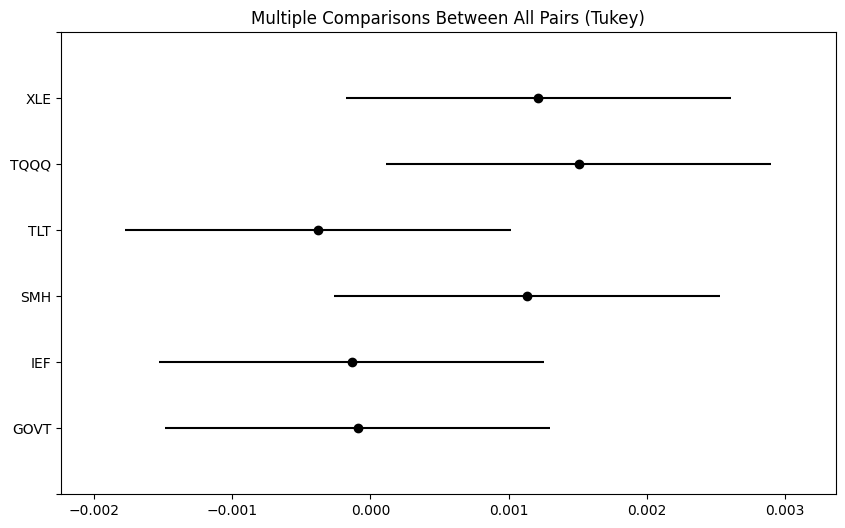

In [35]:
# Fig results

fig, ax = plt.subplots(figsize=(8,8))
tukey.plot_simultaneous(ax=ax);

# 9) Conclusion

This practical paper tryied to explore multicomparison statistical techniques correction´s from 98 EFT probability values returns. They are: T Test, Benferroni, Holm and Tukey HSD.

The test T applyed to the mean returns showed a pvalue result < 0.05 for 12 of them (acceptance to H1). They indicated the significate difference in mean returns from one fund and the sample.

We applyed 2 tests to check and correct this. Benferroni and Holm gave us the same results. They both indicated the acceptance of H1 to BIL, JPST, SGOV, SHV.

But.. the 4 fill 74 and 77 position in a descendent order of mean returns. It indicates to not explore this trade.

Alternatively, we decided to test the significative difference in performance from the biggest mean return fund (TQQ) and the smallest one (TLT). Again, the test result was 0.174 and indicated the no difference.

At last, we applyed the Tukey HSD test between the biggest mean returns( TQQQ, XLE, SMH)  and the smallest ones (TLT, IEF, GOVT).

All corrected pvalues indicated to accept the null hipothesys, bringing more evidence that we shouldn´t trade the mean reversion strategy to explore the means from the top 98 american ETF´s.




